In [1]:
!pip install progressbar2

You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from random import shuffle
import progressbar

def load_data():
    
    path = './'
    pctr1 = os.path.join(path,'data_class1_train.npy')
    pctr2 = os.path.join(path,'data_class2_train.npy')
    pctr3 = os.path.join(path,'data_class3_train.npy')
    pcte1 = os.path.join(path,'data_class1_test.npy')
    pcte2 = os.path.join(path,'data_class2_test.npy')
    pcte3 = os.path.join(path,'data_class3_test.npy')
    
    
    train1 = np.load(pctr1)
    train2 = np.load(pctr2)
    train3 = np.load(pctr3)
    test1 = np.load(pcte1)
    test2 = np.load(pcte2)
    test3 = np.load(pcte3)
    
    return train1, train2, train3, test1, test2, test3

In [3]:
def get_predictions(x, mu, cov, pi, prior):
    sum_g = 0
    l = len(cov)
    g = x-mu[0]
    for i in range(l):
        I = np.identity(cov[i].shape[0], dtype=float)
        p = 1e-2
        I = p*I
        cov[i]+=I
        sum_g+=(pi[i]*(np.linalg.det(cov[i])**-.5)*((2 * np.pi)**(-x.shape[0]/2.))* np.exp(-.5 * np.matmul((x - mu[i]),np.matmul(np.linalg.inv(cov[i]),(x- mu[i]).T).T)))
    return sum_g*prior

In [4]:
def get_confusion_mat(c1, c2, c3, classes):
    
    lis = []
    if(c3!=0):
        conf_mat = np.full((3,3),1e-10)
        for i in range(c1):
            lis.append(0)
        for i in range(c2):
            lis.append(1)
        for i in range(c3):
            lis.append(2)
        for i in range(len(classes)):
            conf_mat[lis[i]][classes[i]]+=1
        return np.array(conf_mat)
    else:
        conf_mat = np.full((2,2),1e-10)
        for i in range(c1):
            lis.append(0)
        for i in range(c2):
            lis.append(1)
        for i in range(len(classes)):
            conf_mat[lis[i]][classes[i]]+=1

        return np.array(conf_mat)

In [5]:
def metric(conf_matrix):
    x = conf_matrix.shape[0]
    precision = []
    accuracy = []
    recall = []
    f_measure = []
    total_sum = np.sum(conf_matrix)
    for i in range(x):
        TP = conf_matrix[i][i]
        FN = np.sum(conf_matrix[i,:])-conf_matrix[i][i]
        FP = np.sum(conf_matrix[:,i])-conf_matrix[i][i]
        TN = total_sum-(TP+FP+FN)

        recal = TP/(TP+FN)
        preci = TP/(TP+FP)
        acc = (TP+TN)/(TP+TN+FP+FN)
        
        precision.append(preci)
        recall.append(recal)
        accuracy.append(acc)
        f_measure.append((2*recal*preci)/(recal+preci))
        
    return accuracy,precision,recall,f_measure

In [6]:
def pair_plot(test1, test2, train1, train2, mu1, cov1, pi1, mu2, cov2, pi2, il, jl):
    le1 = train1.shape[0]
    le2 = train2.shape[0]
    le = le1+le2
    g1 = []
    g2 = []
    lw1 = test1.shape[0]
    lw2 = test2.shape[0]
    for i in range(lw1):
        pr = get_predictions(test1[i], mu1, cov1, pi1, le1/le)
        g1.append(pr)
        pr = get_predictions(test1[i], mu2, cov2, pi2, le2/le)
        g2.append(pr)
    for i in range(lw2):
        pr = get_predictions(test2[i], mu1, cov1, pi1, le1/le)
        g1.append(pr)
        pr = get_predictions(test2[i], mu2, cov2, pi2, le2/le)
        g2.append(pr)


    classes = []
    lw = lw1+lw2
    for i in range(lw):
        classes.append(np.argmax([g1[i],g2[i]]))

    conf_mat = get_confusion_mat(lw1, lw2, 0, classes)
    print("Confusion Matrix")
    print(conf_mat)
    temp = np.array(metric(conf_mat))
    print("Accuracy: ",temp[0,:])
    print("Precision: ",temp[1,:])
    print("Recall: ",temp[2,:])
    print("F-Measure: ",temp[3,:])
    print("Mean F-Measure: ",np.mean(temp[3,:]))
    print("Mean F-Measure: ",np.mean(temp[3,:]))

In [7]:
def total_plot(test1, test2, test3, train1, train2, train3, mu1, cov1, pi1, mu2, cov2, pi2, mu3, cov3, pi3):
    le1 = train1.shape[0]
    le2 = train2.shape[0]
    le3 = train3.shape[0]
    le = le1+le2+le3
    g1 = []
    g2 = []
    g3 = []
    lw1 = test1.shape[0]
    lw2 = test2.shape[0]
    lw3 = test3.shape[0]
    for i in range(lw1):
        pr = get_predictions(test1[i], mu1, cov1, pi1, le1/le)
        g1.append(pr)
        pr = get_predictions(test1[i], mu2, cov2, pi2, le2/le)
        g2.append(pr)
        pr = get_predictions(test1[i], mu3, cov3, pi3, le3/le)
        g3.append(pr)
    for i in range(lw2):
        pr = get_predictions(test2[i], mu1, cov1, pi1, le1/le)
        g1.append(pr)
        pr = get_predictions(test2[i], mu2, cov2, pi2, le2/le)
        g2.append(pr)
        pr = get_predictions(test2[i], mu3, cov3, pi3, le3/le)
        g3.append(pr)
    for i in range(lw3):
        pr = get_predictions(test3[i], mu1, cov1, pi1, le1/le)
        g1.append(pr)
        pr = get_predictions(test3[i], mu2, cov2, pi2, le2/le)
        g2.append(pr)
        pr = get_predictions(test3[i], mu3, cov3, pi3, le3/le)
        g3.append(pr)


    classes = []
    lw = lw1+lw2+lw3
    for i in range(lw):
        classes.append(np.argmax([g1[i],g2[i],g3[i]]))

    conf_mat = get_confusion_mat(lw1, lw2, lw3, classes)
    print(conf_mat)
    temp = np.array(metric(conf_mat))
    print("Accuracy: ",temp[0,:])
    print("Precision: ",temp[1,:])
    print("Recall: ",temp[2,:])
    print("F-Measure: ",temp[3,:])
    print("Mean F-Measure: ",np.mean(temp[3,:]))

In [8]:
def gaussian_normal(x, mu, cov):
    I = np.identity(cov.shape[0], dtype=float)
    p = 1e-2
    I = p*I
    cov+=I
    inv_cov = np.linalg.inv(cov)
    g = (np.linalg.det(cov)**-.5)*((2 * np.pi)**(-x.shape[1]/2.))* np.exp(-.5 * np.einsum('ij, ij -> i',x - mu,np.dot(np.linalg.inv(cov),(x- mu).T).T)) 
    return g

def gmm(cluster, pts, k, dims):
    mu = []                    #mean of each cluster
    cov = []                   #covaraince matrix for each cluster
    pi =  []                   #mixture coefficients for each clusters
    n = len(pts)               #total number of points in the given class
    gamma = np.ndarray(shape=(n,k),dtype=float)
    for i in range(k):
        pi.append(cluster[i].shape[0]/n)
        mean = np.mean(cluster[i], axis=0)
        mu.append(mean)
        covariance = np.cov(cluster[i].T)
        cov.append(covariance)
    
    print('Initialization Done')
    likelihood = []
    for t in range(100):
        for j in range(k):
            gamma[:,j] = pi[j]*gaussian_normal(pts,mu[j],cov[j])
        li = np.sum(np.log(np.sum(gamma, axis = 1)))
        
        likelihood.append(li)
        gamma = (gamma.T / np.sum(gamma, axis = 1)).T
        n_eff = np.sum(gamma, axis = 0)
        for i in range(k):
            mu[i] = (1/n_eff[i])*np.sum(gamma[:, i] * pts.T, axis = 1).T
            x_mu = np.matrix(pts - mu[i])
            cov[i] = np.array(1/n_eff[i])*np.dot(np.multiply(x_mu.T,  gamma[:, i]), x_mu)
            pi[i] = n_eff[i]/n
    
    plt.plot(likelihood)
    plt.title('Log-Likelihood vs Iteration plot')
    plt.xlabel('Iterations')
    plt.ylabel('log-likelihood')
    plt.show()

    return mu, cov, pi, gamma

In [9]:
def kmeans(data,k, dim):
    
    l = data.shape[0]
    lis = []
    for i in range(l):
        lis.append(data[i,:])
    
    shuffle(lis)
    cluster = []
    mean = []
    for i in range(k):
        mean.append(lis[i])
            
    
    for i in progressbar.progressbar(range(50)):
        cluster[:]=[]
        
        distance=[]
        clust=[]
        for j in range(l):
            distance.append(1e15)
            clust.append(-1)
        for j in range(k):
            temp=[]
            cluster.append(temp)
        for j in range(k):
            dis = np.linalg.norm(data-mean[j], axis=1)
            for p in range(l):
                if(dis[p]<distance[p]):
                    distance[p]=dis[p]
                    clust[p] = j
                    
        for j in range(l):
            cluster[clust[j]].append(data[j])
            
        for j in range(k):
            mean[j]=np.mean(cluster[j], axis=0)
            
    for i in progressbar.progressbar(range(k)):
        cluster[i]=np.array(cluster[i])
        
    return mean, cluster

100% (50 of 50) |########################| Elapsed Time: 0:00:17 Time:  0:00:17
100% (16 of 16) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

1**done


100% (50 of 50) |########################| Elapsed Time: 0:00:30 Time:  0:00:30
100% (16 of 16) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

2**done


100% (50 of 50) |########################| Elapsed Time: 0:00:25 Time:  0:00:25
100% (16 of 16) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


3**done
16 (2939, 24)
16 (7667, 24)
16 (5693, 24)
Initialization Done


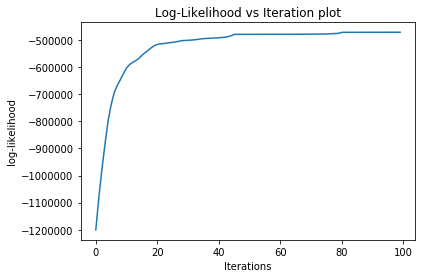

***First Cluster Done***
Initialization Done


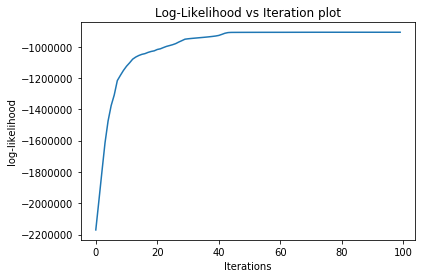

***Second Cluster Done***
Initialization Done


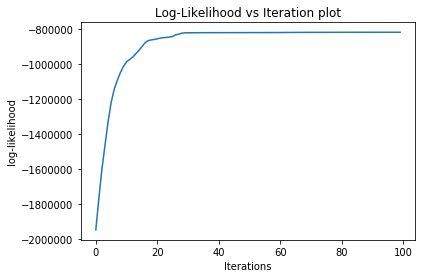

***Third Cluster Done***
***Loading Done***
[[ 15257.  19323.  20784.]
 [ 15779.  42255.  28688.]
 [ 22477.  33631.  39848.]]
Accuracy:  [ 0.67080179  0.59074029  0.55646483]
Precision:  [ 0.28510829  0.44381308  0.44612629]
Recall:  [ 0.27557619  0.4872466   0.41527367]
F-Measure:  [ 0.28026121  0.46451677  0.43014746]
Mean F-Measure:  0.391641811742
16  completed


In [10]:
def main():
    train1, train2, train3, test1, test2, test3 = load_data()
    K = [16]
    dims = 24
    for k in K:
        mean, cluster1 = kmeans(train1, k, dims)
        np.save('kmeans_mean1_k_{}.npy'.format(k),mean)
        print('1**done')
        mean, cluster2 = kmeans(train2, k, dims)
        np.save('kmeans_mean2_k_{}.npy'.format(k),mean)
        print('2**done')
        mean, cluster3 = kmeans(train3, k, dims)
        np.save('kmeans_mean3_k_{}.npy'.format(k),mean)
        print('3**done')

        print(len(cluster1), cluster1[0].shape)
        print(len(cluster2), cluster2[0].shape)
        print(len(cluster3), cluster3[0].shape)
        
        mu1, cov1, pi1, gamma = gmm(cluster1, train1, k, dims)
        np.save('kmeans_mu1_k_{}.npy'.format(k),mu1)
        np.save('kmeans_cov1_k_{}.npy'.format(k),cov1)
        np.save('kmeans_pi1_k_{}.npy'.format(k),pi1)
        print('***First Cluster Done***')
        mu2, cov2, pi2, gamma = gmm(cluster2, train2, k, dims)
        np.save('kmeans_mu2_k_{}.npy'.format(k),mu2)
        np.save('kmeans_cov2_k_{}.npy'.format(k),cov2)
        np.save('kmeans_pi2_k_{}.npy'.format(k),pi2)
        print('***Second Cluster Done***')
        mu3, cov3, pi3, gamma = gmm(cluster3, train3, k, dims)
        np.save('kmeans_mu3_k_{}.npy'.format(k),mu3)
        np.save('kmeans_cov3_k_{}.npy'.format(k),cov3)
        np.save('kmeans_pi3_k_{}.npy'.format(k),pi3)
        print('***Third Cluster Done***')
        mu1 = np.load('kmeans_mu1_k_{}.npy'.format(k))
        cov1 = np.load('kmeans_cov1_k_{}.npy'.format(k))
        pi1 = np.load('kmeans_pi1_k_{}.npy'.format(k))
        mu2 = np.load('kmeans_mu2_k_{}.npy'.format(k))
        cov2 = np.load('kmeans_cov2_k_{}.npy'.format(k))
        pi2 = np.load('kmeans_pi2_k_{}.npy'.format(k))
        mu3 = np.load('kmeans_mu3_k_{}.npy'.format(k))
        cov3 = np.load('kmeans_cov3_k_{}.npy'.format(k))
        pi3 = np.load('kmeans_pi3_k_{}.npy'.format(k))
        print('***Loading Done***')
#         pair_plot(test1, test2, train1, train2, mu1, cov1, pi1, mu2, cov2, pi2, 1, 2)
#         pair_plot(test1, test3, train1, train3, mu1, cov1, pi1, mu3, cov3, pi3, 1, 3)
#         pair_plot(test2, test3, train2, train3, mu2, cov2, pi2, mu3, cov3, pi3, 2, 3)
        
        
        total_plot(test1, test2, test3, train1, train2, train3, mu1, cov1, pi1, mu2, cov2, 
                   pi2, mu3, cov3, pi3)
        print(k, ' completed')
if(__name__=="__main__"):    
    main()    